In [4]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

## EDA

Most of the EDA was done in the previous implementation.

In [2]:
df = yf.download(tickers='NVDA', start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [10]:
df['log_return'] = np.log(1 + df['Adj Close'].pct_change())
df = df.dropna()

In [6]:
def adf_test(dataset):

    dftest = adfuller(dataset, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    return print(dfoutput)

## Evaluating Variables
For the data to be stationary, the p-value of the ADF test should be <= significance level (0.05 for this example). If the p-value is greater than the significance level then we can say that it is likely that the data is not stationary.

From the results below, we can see that `'Adj Close'` is almost certainly not stationary but `'log_returns'` is.

In [14]:
adf_test(df['Adj Close'])

Test Statistic                    0.493467
p-value                           0.984673
#Lags Used                       27.000000
Number of Observations Used    2187.000000
dtype: float64


In [15]:
adf_test(df['log_return'])

Test Statistic                -1.682759e+01
p-value                        1.164886e-29
#Lags Used                     7.000000e+00
Number of Observations Used    2.207000e+03
dtype: float64


In [18]:
ARIMA_model = pm.auto_arima(df['log_return'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

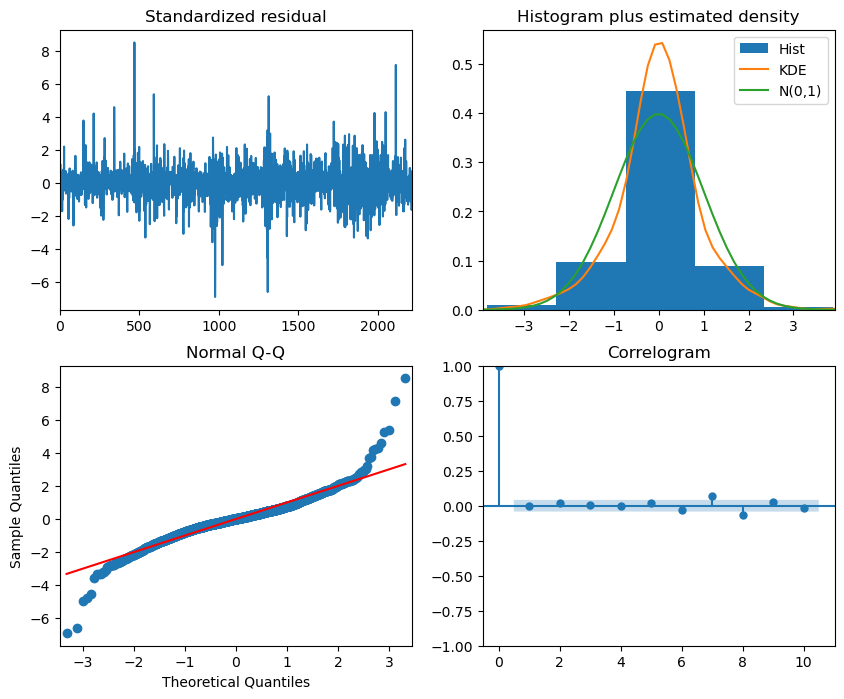

In [24]:
ARIMA_model.plot_diagnostics(figsize=(10, 8))
plt.show()